<a href="https://colab.research.google.com/github/Omonov01/DataScienseProject/blob/main/classification_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fastai==2.5.3

In [ ]:
import torch
import fastai
print(fastai.__version__)
print(torch.__version__)

2.5.3
1.10.2+cu102


In [ ]:
#!git clone https://github.com/EscVM/OIDv4_ToolKit.git
#!cd OIDv4_ToolKit && pip install -r requirements.txt


In [ ]:
#!cd OIDv4_ToolKit && python main.py -h

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Apple Banana Cake --limit 400 --type_csv train

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

path = Path('train')
# fls = get_image_files(path)
# failed = verify_images(path)
# failed

#DataBlock yaratamiz
food = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#DataLoader yaratamiz
dls = food.dataloaders(path)

#datasetni tekshirish

# dls.train.show_batch(max_n=32,nrows=4)
# train

learn = cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.147079,0.473412,0.854167,00:26


epoch,train_loss,valid_loss,accuracy,time
0,0.426147,0.308837,0.904167,00:26
1,0.296546,0.396621,0.875000,00:26
2,0.218972,0.372057,0.895833,00:26
3,0.160453,0.352984,0.895833,00:26


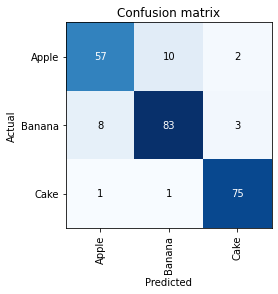

In [ ]:
variable = ClassificationInterpretation.from_learner(learn)
variable.plot_confusion_matrix()

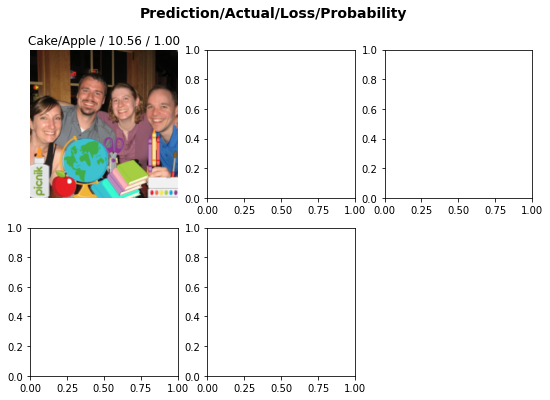

In [ ]:
variable.plot_top_losses(5)

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Banana
Bashorat:100.0 %


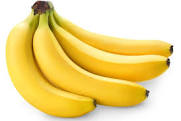

In [ ]:
img = PILImage.create(upload.data[-1])
pred,pred_id,prob = learn.predict(img)
print(f'Bashorat:{pred}')
print(f'Bashorat:{prob[pred_id]*100:.1f} %')
img

o'qitilgan modelni saqlab olamiz


In [ ]:
learn.export("foods_model.pkl")

modelni testlab ko'ramiz

In [ ]:
model = load_learner("/content/foods_model.pkl")

In [ ]:
model.predict(img)

('Banana', TensorBase(1), TensorBase([4.3845e-06, 9.9999e-01, 8.9636e-07]))